## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

### Libraries for Decision Tree Analysis

In [ ]:
# Libraries to help with reading and manipulating data -- Testing for Second Commit 
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
)

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the dataset
alllife_customer_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML-Project/Loan_Modelling.csv')

In [ ]:
# copying the data to another variable to avoid any changes to original data
df = alllife_customer_data.copy()

## Data Overview

* Observations
* Sanity checks

In [ ]:
# Displaying the first rows of the data
df.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [ ]:
# Shape of Dataset
df.shape

(5000, 14)

In [ ]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
# checking for missing values
df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


In [ ]:
# checking the number of unique values in each column. All IDs (Or Customers) are Unique
df.nunique()

,0
ID,5000
Age,45
Experience,47
Income,162
ZIPCode,467
Family,4
CCAvg,108
Education,3
Mortgage,347
Personal_Loan,2


In [ ]:
# Dropping ID Column as it adds no value
df.drop('ID', axis=1, inplace=True)


In [ ]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [ ]:
# Let's look at the statistical summary of the data. Note: ZIPCode
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


**The column 'Experience' contains negative numbers**

In [ ]:
# Replaced the negative numbers found in the column 'Experience' with its absolute value or positive
# as years of experience has to be greater than 0. Tese negative numbers were most likely inputted incorrectly
df.loc[df['Experience'] < 0, 'Experience'] = df.loc[df['Experience'] < 0, 'Experience'].abs()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?
6. How does a customer's interest in purchasing a loan vary with their income?
7. How does a customer's interest in purchasing a loan vary with what is the customer's average monthly credit card spending ?

##  Functions need to be defined to carry out the EDA.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Univariate and bivariate analysis

### Observations on Personal Loan

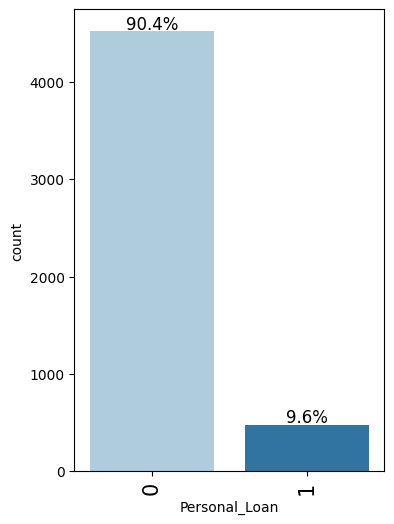

In [ ]:
labeled_barplot(df, "Personal_Loan", perc=True)

#### Only 9.6% of the bank's customer accepted the personal loan offered in the last campaign

### Observations on Education

### Observations on Education

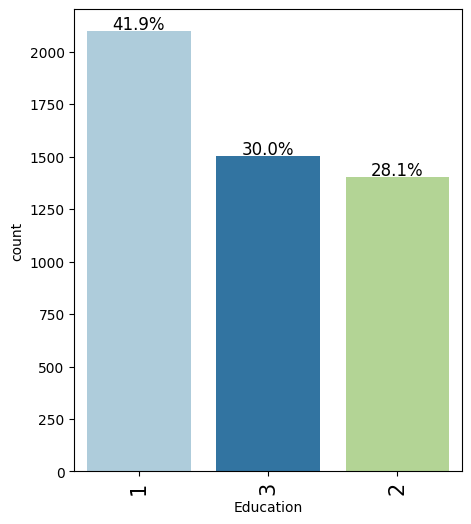

In [ ]:
labeled_barplot(df, "Education", perc=True)

#### 41.9% of the bank's customer have a bachelors degree.

### 1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

In [ ]:
mortgage_col = 'Mortgage'

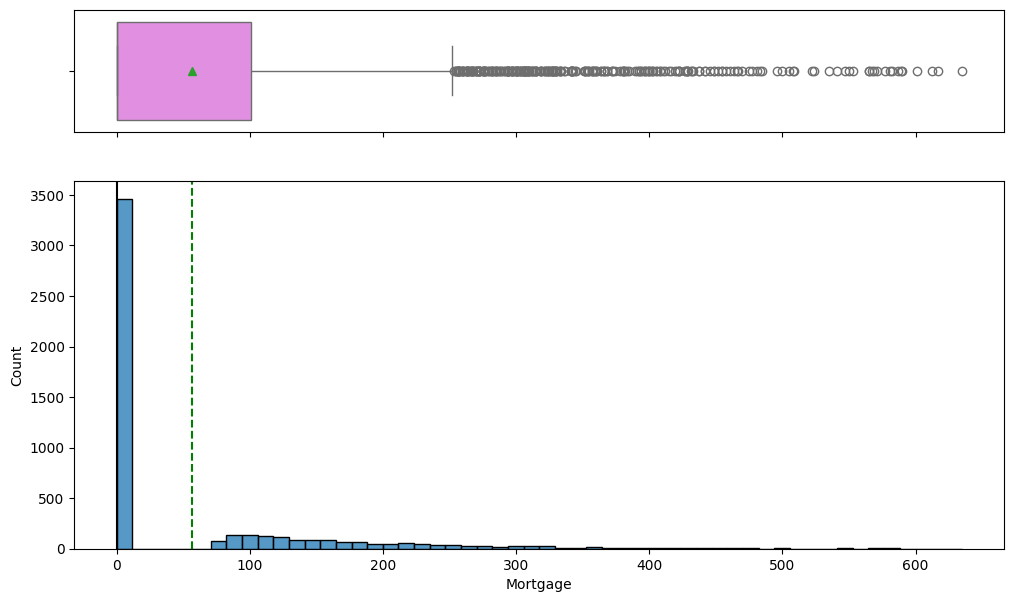

In [ ]:
histogram_boxplot(df, mortgage_col)

In [ ]:
# 3462 out of the 5000 records have no mortgage debt
df[df[mortgage_col] ==0].count()

,0
Age,3462
Experience,3462
Income,3462
ZIPCode,3462
Family,3462
CCAvg,3462
Education,3462
Mortgage,3462
Personal_Loan,3462
Securities_Account,3462


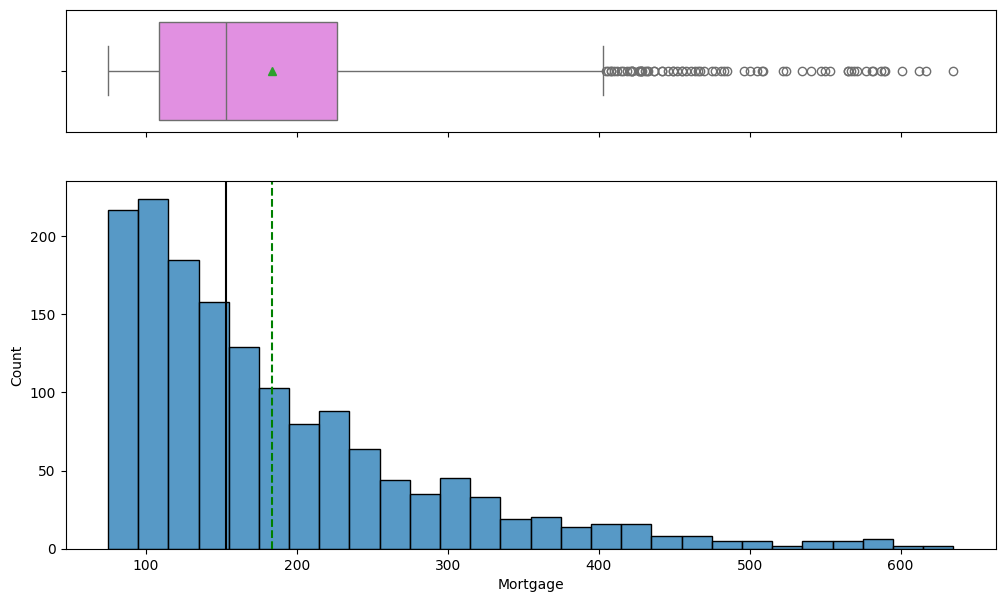

In [ ]:
# Reviewing distribution excluding records with No Mortgage Debt.
# This is assuming 0 Mortgage does not imply that no amount was supplied.
histogram_boxplot(df[df[mortgage_col] !=0], mortgage_col)

### **Answer:** The Distrbution is heavily skewed to the right where very few customers of the Bank have high mortgages. In addition , 3462 customer records out of the 5000 in the dataset show a mortgage amount of 0. **Assumption:** : The mortgage values of 0  values are real and not because the bank does not have that information, and therefore treating the 0 amounts as missing values. The outliers are high debt mortgage amounts relative to the Mean of the other customers of the bank's dataset.

### 2. How many customers have credit cards?

In [ ]:
df['CreditCard'].value_counts()

,count
CreditCard,
0,3530
1,1470


### **Answer**: From the results 1470 customers use or have a credit issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

### 3. What are the attributes that have a strong correlation with the target attribute (personal loan)?

In [ ]:
personal_loan_col = 'Personal_Loan'


In [ ]:
df.corr()[personal_loan_col][:-1].sort_values(ascending=False)

,Personal_Loan
Personal_Loan,1.000000
Income,0.502462
CCAvg,0.366889
CD_Account,0.316355
Mortgage,0.142095
Education,0.136722
Family,0.061367
Securities_Account,0.021954
Online,0.006278
ZIPCode,-0.002974


### **Answer:** ***Personal Loan*** has a strong  positive correlation with ***Income*** of **0.502**, a much less postive correlation with ***average spending on credit cards per month (CCAvg)*** and a ***customer having a certificate of deposit (CD) account with the bank (CD_Account)*** of **0.367** and **0.316**, respectively.

### 4. How does a customer's interest in purchasing a loan vary with their age?

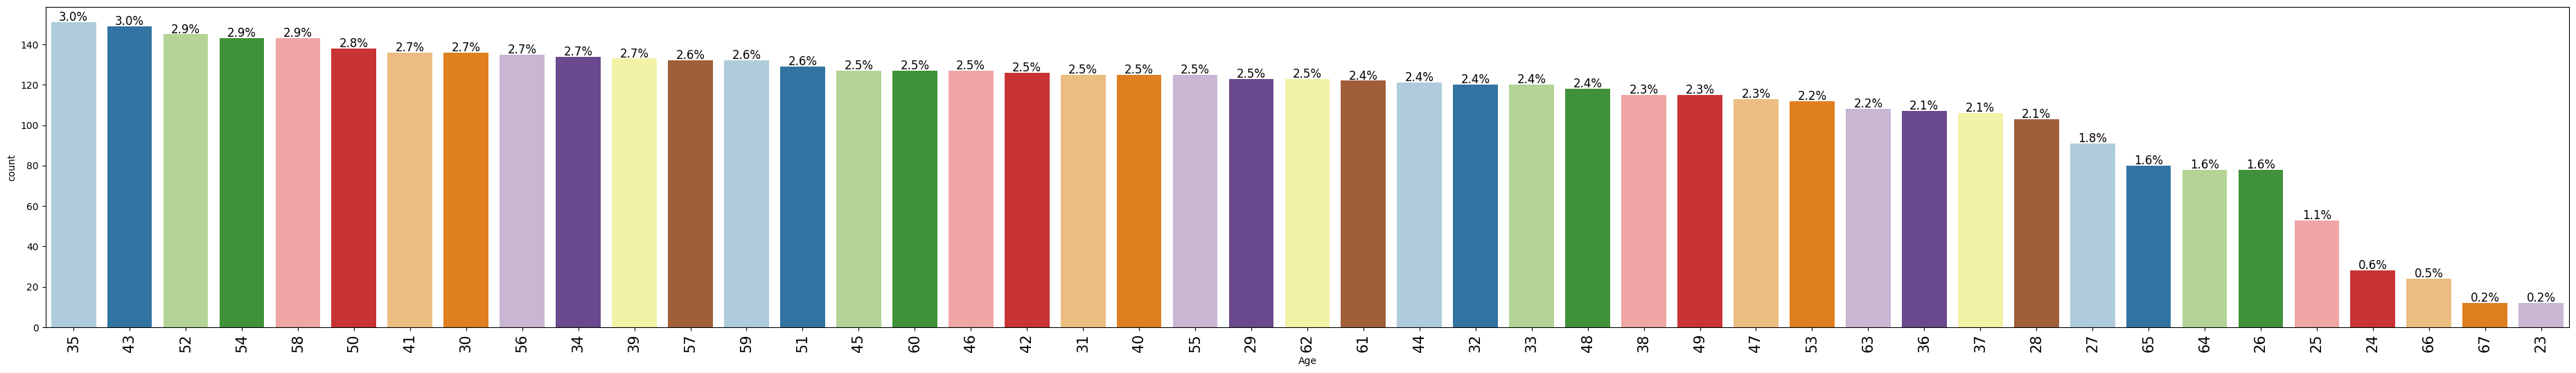

In [ ]:
# Running labeled_barplot function determine representation of age range in dataset
labeled_barplot(df, "Age", perc=True)

In [ ]:
personal_loan_equal_1_df = df[df['Personal_Loan'] == 1]
personal_loan_equal_0_df = df[df['Personal_Loan'] == 0]

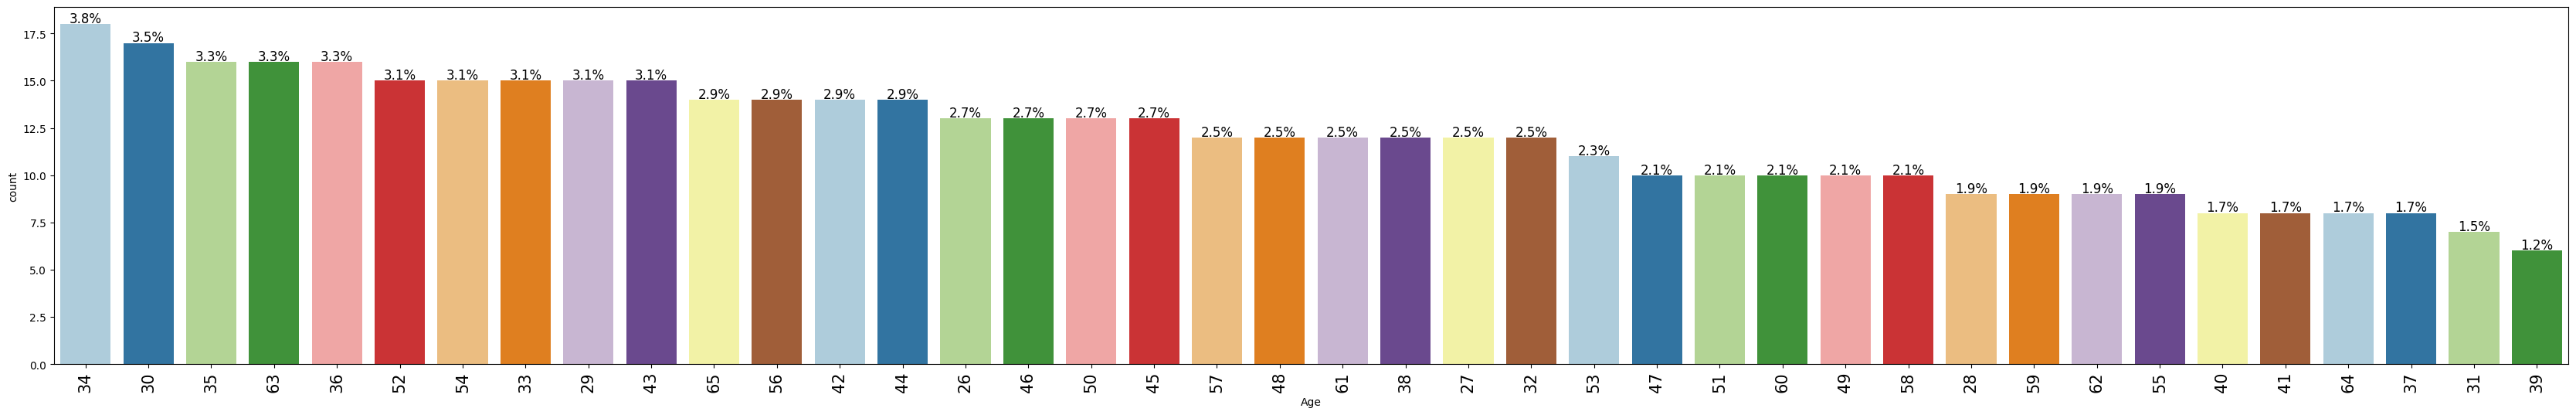

In [ ]:
# Running labeled_barplot function to determine representation of age range in dataset for those customers that did accept the personal loan offered in the last campaign.
labeled_barplot(personal_loan_equal_1_df ,'Age' , perc=True)

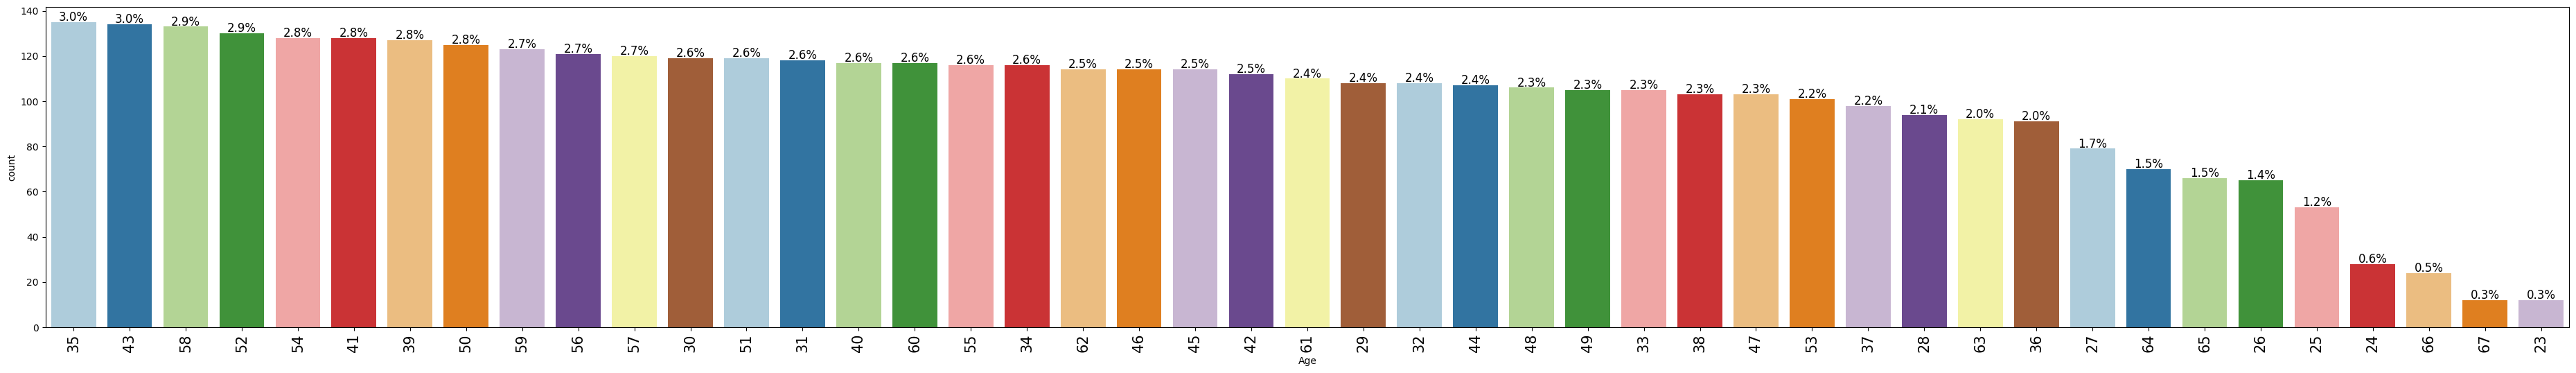

In [ ]:
# Running labeled_barplot function to determine representation of age range in dataset for those customers that did NOT accept the personal loan offered in the last campaign.
labeled_barplot(personal_loan_equal_0_df ,'Age' , perc=True)

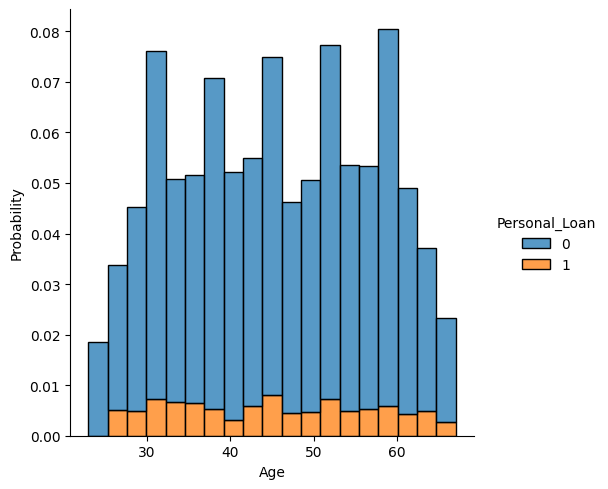

In [ ]:
# Plotting using the Displot function for visualizing the histogram distribution of age in the dataset for personal loans offered in last campaign, discriminant by whether loans offers were accepted or not.
sns.displot(df, x="Age", hue='Personal_Loan', stat="probability", common_norm=True, multiple="stack");

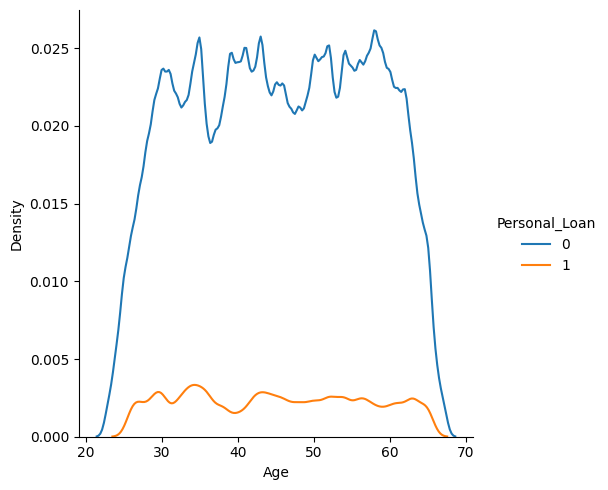

In [ ]:
# Plotting using the Displot function for visualizing the density distribution of age in the dataset for personal loans offered in last campaign, discriminant by whether loans offers were accepted or not.
sns.displot(df, x="Age", hue='Personal_Loan', kind= "kde", bw_adjust=.25);

In [ ]:
interest_loan_col = df[df['Personal_Loan'] == 1]['Age']

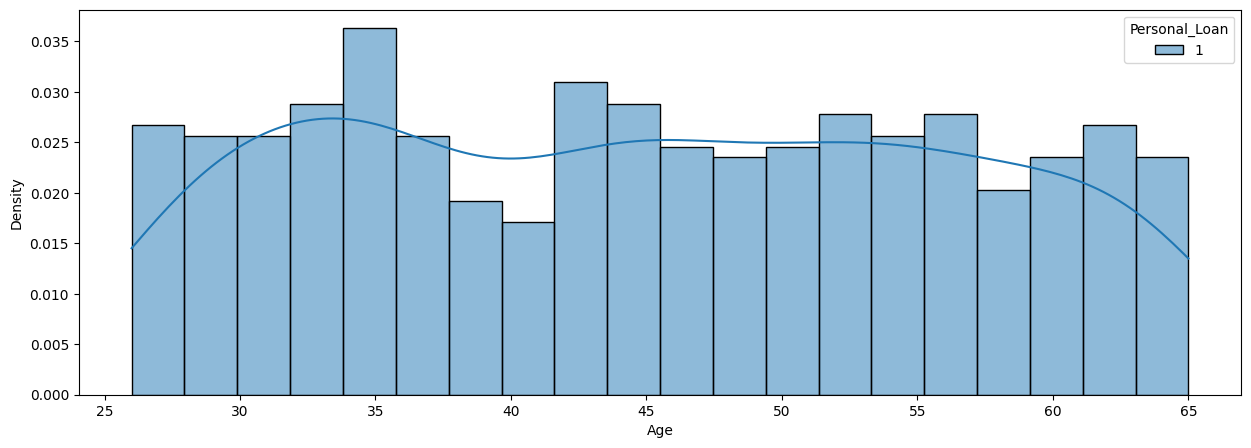

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x=interest_loan_col, hue=df[df['Personal_Loan'] == 1]['Personal_Loan'], binwidth = 2, stat= 'density', kde=True);


In [ ]:
no_interest_loan_col = df[df['Personal_Loan'] == 0]['Age']

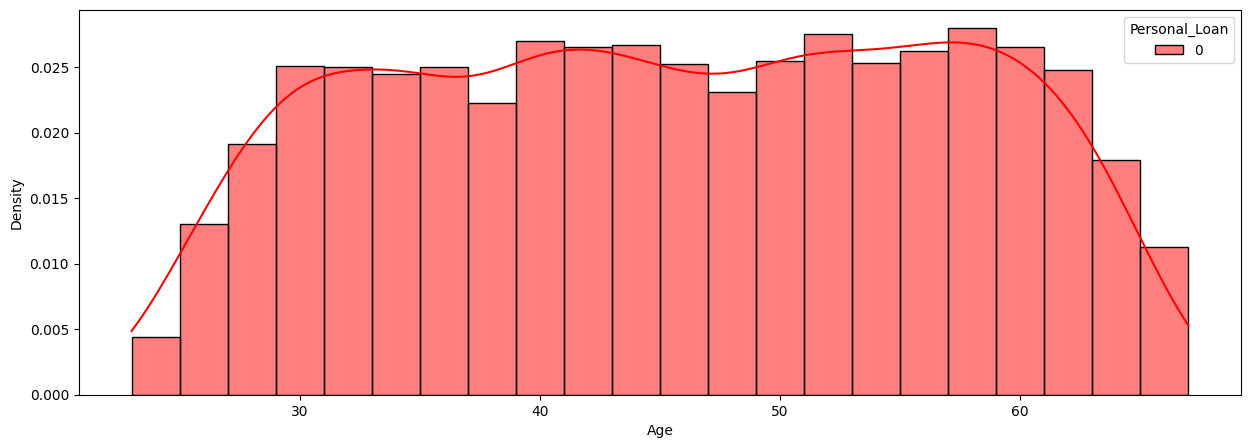

In [ ]:
# Histplot to visualize the distribution
plt.figure(figsize=(15,5))
sns.histplot(data=df, x= no_interest_loan_col, hue=df[df['Personal_Loan'] == 0]['Personal_Loan'], binwidth = 2, stat= 'density', kde=True, palette=['Red']);

### **Answer**: From the various visualization plots generated, the customer's interest in purchasing a loan does NOT vary significantly with age, except maybe with isolated age ranges from 39-41 and 58-60 where the preference was NOT to accept the personal loan offers, but not so significant. In addition, all ages were represented and proportionally equally in the dataset with the exception of the lower and upper age ranges.

### 5. How does a customer's interest in purchasing a loan vary with their education?

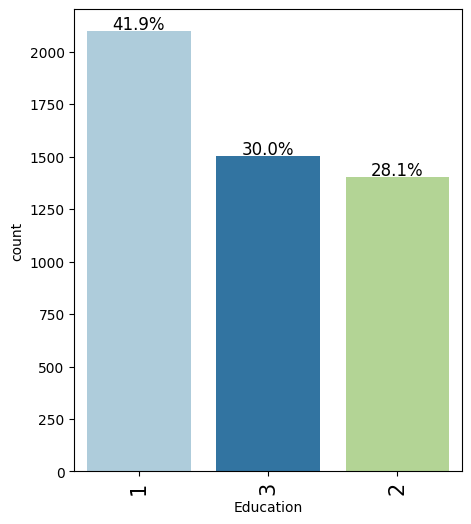

In [ ]:
# Running labeled_barplot function determine representation of education level in dataset
labeled_barplot(df, "Education", perc=True)

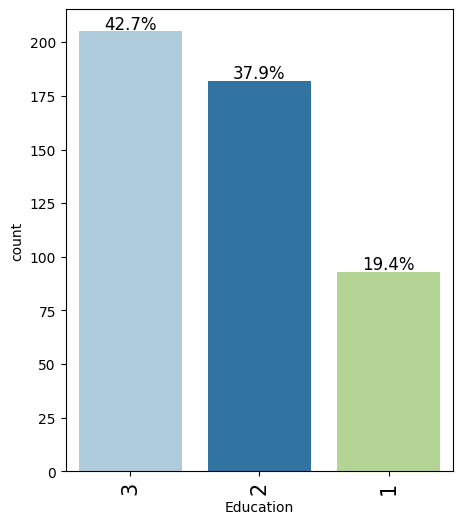

In [ ]:
# Running labeled_barplot function to determine percentage in Education level in dataset for those customers that did accept the personal loan offered in the last campaign.
labeled_barplot(personal_loan_equal_1_df ,'Education' , perc=True)

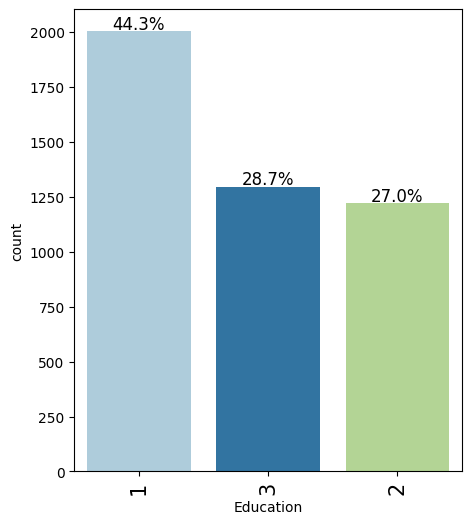

In [ ]:
# Running labeled_barplot function to determine percentage in Education level in dataset for those customers that did NOT accept the personal loan offered in the last campaign.
labeled_barplot(personal_loan_equal_0_df ,'Education' , perc=True)

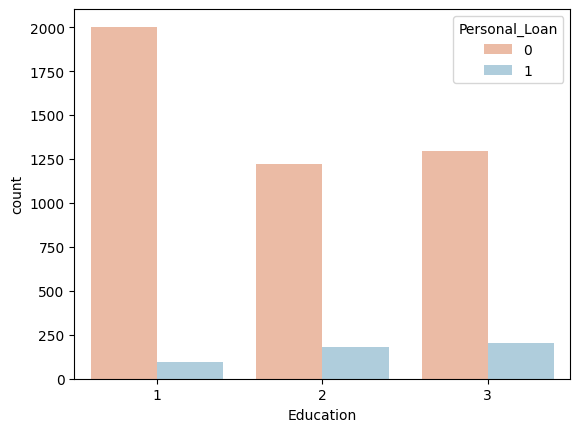

In [ ]:
sns.countplot(data=df, x='Education', palette ="RdBu", hue = 'Personal_Loan' );

In [ ]:
df.groupby('Education')['Personal_Loan'].value_counts(normalize=False)

Education  Personal_Loan
1          0                2003
           1                  93
2          0                1221
           1                 182
3          0                1296
           1                 205
Name: count, dtype: int64

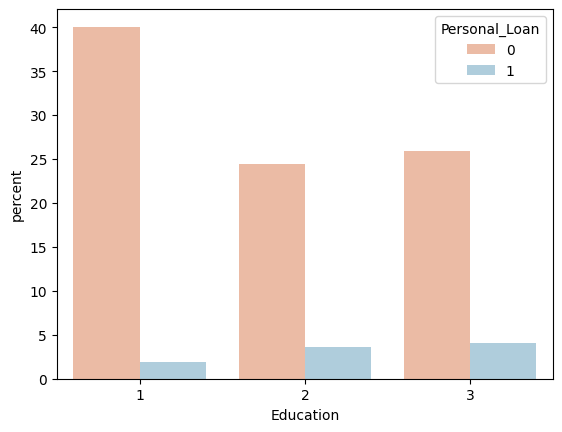

In [ ]:
sns.countplot(data=df, x='Education', palette ="RdBu", hue = 'Personal_Loan', stat='percent');

In [ ]:
# Group by Education count of Personal_Loans and percentile
df.groupby('Education')['Personal_Loan'].value_counts(normalize=True)


Education  Personal_Loan
1          0                0.955630
           1                0.044370
2          0                0.870278
           1                0.129722
3          0                0.863424
           1                0.136576
Name: proportion, dtype: float64

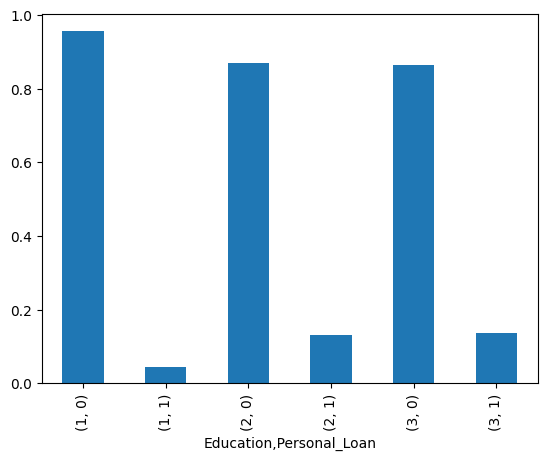

In [ ]:
# Plotting the Proportion table
df.groupby('Education')['Personal_Loan'].value_counts(normalize=True).plot(kind='bar');

### **Answer**: The proportion of customers with undergraduate level of education interest in purchasing a loan was of low interest. Only 4.43% showed interest in comparison with approxiamie average of 13% for both Graduate and Professional levels of education (12.98% and 13.66%, respectively)

### 6. How does a customer's interest in purchasing a loan vary with their income ?

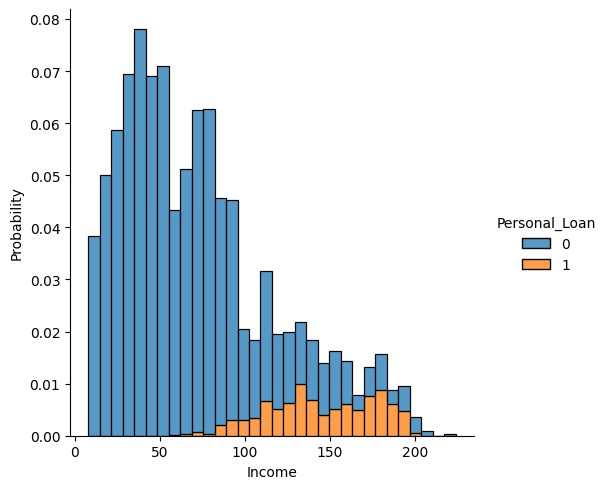

In [ ]:
# Plotting using the Displot function for visualizing the histogram distribution of income in the dataset for personal loans offered in last campaign, discriminant by whether loans offers were accepted or not.
sns.displot(df, x="Income", hue='Personal_Loan', stat="probability", common_norm=True, multiple="stack");

In [ ]:
# Binning Income according to the number of bins generated by the visualization.
df['Income_bin'] = pd.qcut(df['Income'], q=32, labels=None)


In [ ]:
# Generating Proportions for Income bins created
df.groupby('Income_bin')['Personal_Loan'].value_counts(normalize=True)

Income_bin      Personal_Loan
(7.999, 13.0]   0                1.000000
                1                0.000000
(13.0, 19.0]    0                1.000000
                1                0.000000
(19.0, 22.0]    0                1.000000
                                   ...   
(149.0, 162.0]  1                0.375000
(162.0, 180.0]  1                0.553459
                0                0.446541
(180.0, 224.0]  1                0.520000
                0                0.480000
Name: proportion, Length: 64, dtype: float64

In [ ]:
# Removing Income_bin column from dataset
df.drop('Income_bin', axis=1, inplace=True)

### **Answer:** From the Proportion table generated and in accordance to the supporting visualization in the line code above, customers with Incomes below 58,000 did not accept a personal loan offer. Whereas, income ranges above 98,000 accepted loan offers, and significantly higher interest loan offers were accepted by customers with incomes above $ 125,000.

### 7. How does a customer's interest in purchasing a loan vary with what is the customer's average monthly credit card spending ?

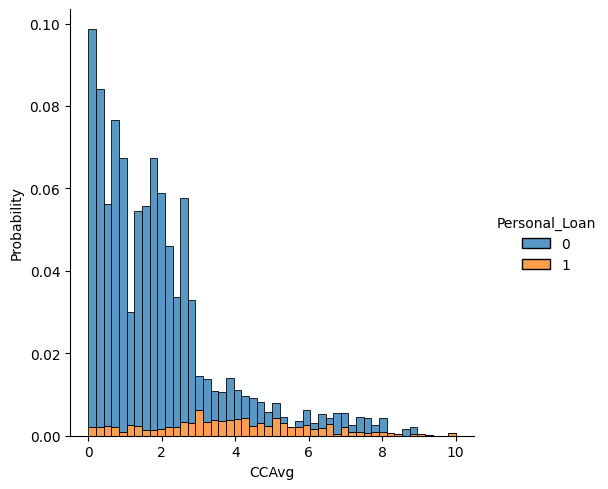

In [ ]:
# Plotting using the Displot function for visualizing the histogram distribution of income in the dataset for personal loans offered in last campaign, discriminant by whether loans offers were accepted or not.
sns.displot(df, x="CCAvg", hue='Personal_Loan', stat="probability", common_norm=True, multiple="stack");

In [ ]:
# Binning customers' average card credit monthly spending in 20 bins
df['ccavg_bin'] = pd.qcut(df['CCAvg'], q=20, labels=None)

In [ ]:
# Generating Proportions for Income bins created
df.groupby('ccavg_bin')['Personal_Loan'].value_counts(normalize=True)

ccavg_bin      Personal_Loan
(-0.001, 0.1]  0                0.989619
               1                0.010381
(0.1, 0.3]     0                0.968539
               1                0.031461
(0.3, 0.4]     0                0.977654
               1                0.022346
(0.4, 0.5]     0                0.950920
               1                0.049080
(0.5, 0.7]     0                0.967213
               1                0.032787
(0.7, 0.8]     0                0.974490
               1                0.025510
(0.8, 1.0]     0                0.985163
               1                0.014837
(1.0, 1.2]     0                0.913333
               1                0.086667
(1.2, 1.4]     0                0.956044
               1                0.043956
(1.4, 1.5]     0                0.977528
               1                0.022472
(1.5, 1.7]     0                0.974729
               1                0.025271
(1.7, 1.9]     0                0.973783
               1                0.026217
(1.9, 2.1]     0                0.975694
               1                0.024306
(2.1, 2.3]     0                0.936170
               1                0.063830
(2.3, 2.5]     0                0.967742
               1                0.032258
(2.5, 2.8]     0                0.928082
               1                0.071918
(2.8, 3.4]     0                0.702128
               1                0.297872
(3.4, 4.3]     0                0.637931
               1                0.362069
(4.3, 6.0]     0                0.552419
               1                0.447581
(6.0, 10.0]    0                0.684647
               1                0.315353
Name: proportion, dtype: float64

In [ ]:
# Removing Income_bin column from dataset
df.drop('ccavg_bin', axis=1, inplace=True)

In [ ]:
# Confirming all Bin related columns were removed from original dataset before preprocessing.
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### **Answer:** From ther proportion table above, and in line with the visualization genertaed, the interest of accepting a personal loan increases signigicantly after the customer's average monthly credit card spending exceeds 2,800 per month. for the Bin[2.8, 3.4] the acceptance rate for a personal loan jumps to 29.79%, and the highest acceptance rate is for the Bin[4.3 ,6.0] at 44.76%.

## Data Preprocessing

In [ ]:
#

###

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


## Model Building

### Data Preparation for Modeling

In [ ]:
# Remove Personal Loan dependent variable
X = df.drop(["Personal_Loan"], axis=1)

In [ ]:
# Isolate dependent variable
Y = df["Personal_Loan"]

In [ ]:
# Create a list of variables in dataset that are considered categorical

df_categorical = ["Family","Education","Securities_Account","CD_Account","Online","CreditCard"]

In [ ]:
# Covert list of columns to category
X[df_categorical] = X[df_categorical].astype("category")

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   int64   
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Securities_Account  5000 non-null   category
 9   CD_Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
dtypes: category(6), float64(1), int64(5)
memory usage: 264.6 KB


In [ ]:
# encoding the categorical variables
X = pd.get_dummies(X, columns= df_categorical, drop_first=True)

In [ ]:
X.head()

,Age,Experience,Income,ZIPCode,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1
0,25,1,49,91107,1.6,0,False,False,True,False,False,True,False,False,False
1,45,19,34,90089,1.5,0,False,True,False,False,False,True,False,False,False
2,39,15,11,94720,1.0,0,False,False,False,False,False,False,False,False,False
3,35,9,100,94112,2.7,0,False,False,False,True,False,False,False,False,False
4,35,8,45,91330,1.0,0,False,False,True,True,False,False,False,False,True


#### **Creating training and test sets**

In [ ]:
# Split the dataset 70/30 - Train  & Test, respectively
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


In [ ]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**

1. Predicting a customer will accept a Personal Loan offer from the bank.

2. Predicting a customer will not accept a Personal Loan offer from the bank.

**Which case is more important?**

* If the objective is to increase the loans in the bank we are interested in recruiting customers to the bank that are likely to accept a personal loan offer.

**How to reduce this loss i.e need to reduce False Positives?**
*  `precision` should be maximized, the greater the precision higher the chances of minimizing the false positives.

## Model Performance Improvement

Metric Functions

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree (default)

#### Decision Tree (default) - Class Weight = Not Balanced

In [ ]:
model_def = DecisionTreeClassifier(criterion="gini", random_state=1)
model_def.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

 Checking model performance on training set

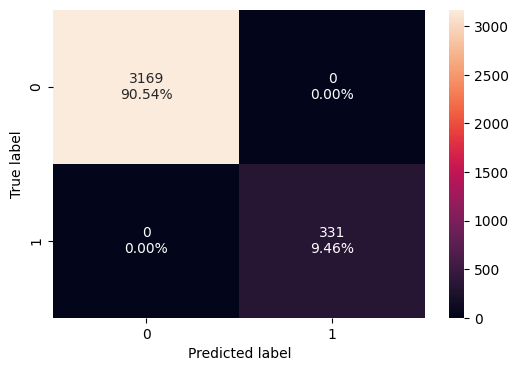

In [ ]:
confusion_matrix_sklearn(model_def, X_train, y_train)

In [ ]:
decision_tree_default_perf_train = model_performance_classification_sklearn(
    model_def, X_train, y_train
)
decision_tree_default_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


From the results above the confusion matrix shows the decision tree model  biased towards the dominant class for customers that did not accept the loan offer , Personal_Loan = 0. The dataset is unbalanced as the dataset conatins 90.6% of its records being  of cistumers that did not accept the loan offer, opposed to 9.4% that did. The model is overfitting because of the presence of a dominant class in the training set.

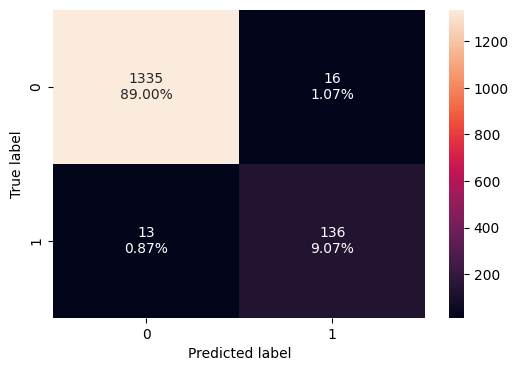

In [ ]:
## Running the model with the test dataset
confusion_matrix_sklearn(model_def, X_test, y_test)

In [ ]:
decision_tree_default_perf_test = model_performance_classification_sklearn(
    model_def, X_test, y_test
)
decision_tree_default_perf_test

,Accuracy,Recall,Precision,F1
0,0.980667,0.912752,0.894737,0.903654


#### Decision Tree (default) - Class Weight = Balanced

In [ ]:
# Adding a hyperparameter and setting to balanced
model_def_balanced = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model_def_balanced.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

Checking model performance on test set

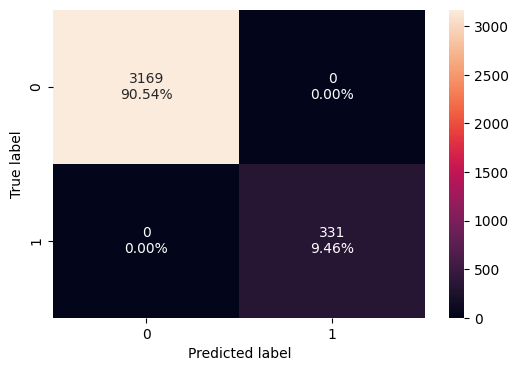

In [ ]:
confusion_matrix_sklearn(model_def_balanced, X_train, y_train)

In [ ]:
decision_tree_def_bal_perf_train = model_performance_classification_sklearn(
    model_def_balanced, X_train, y_train
)
decision_tree_def_bal_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

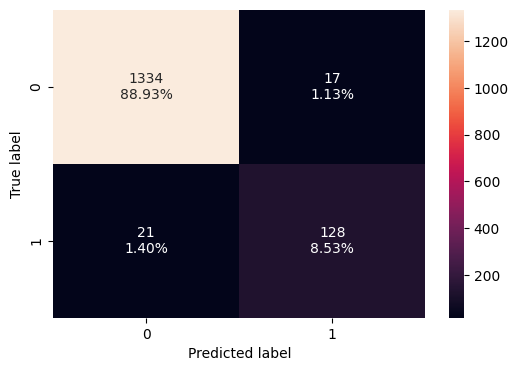

In [ ]:
confusion_matrix_sklearn(model_def_balanced, X_test, y_test)

In [ ]:
decision_tree_def_bal_perf_test = model_performance_classification_sklearn(
    model_def_balanced, X_test, y_test
)
decision_tree_def_bal_perf_test

,Accuracy,Recall,Precision,F1
0,0.974667,0.85906,0.882759,0.870748


### Decision Tree (Pre-pruning)

#### Pre prunning - Class Weight = Not Balanced

In [ ]:
# Define the parameters of the tree to iterate over
max_depth_values = [5,10,15,None]
max_leaf_nodes_values = [6]
min_samples_split_values = [10]
criterion=['gini','entropy']
splitter=['best','random']

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for criterion_val in criterion:
        for splitter_val in splitter:
            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes_values[0], # Accessing the element
                min_samples_split=min_samples_split_values[0], # Accessing the element
                criterion=criterion_val,
                splitter=splitter_val,
               # class_weight='balanced',
                random_state=1
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator
                best_criterion=criterion_val
                best_splitter=splitter_val

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")
print(f"Criterion: {best_criterion}")
print(f"Splitter: {best_splitter}")


Best parameters found:
Max depth: 5
Max leaf nodes: 6
Min samples split: 10
Best test recall score: 0.7516778523489933
Criterion: gini
Splitter: best


In [ ]:
# creating an instance of the best model
model_pre_prune = best_estimator

# fitting the best model to the training data
model_pre_prune.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6, min_samples_split=10,
                       random_state=1)

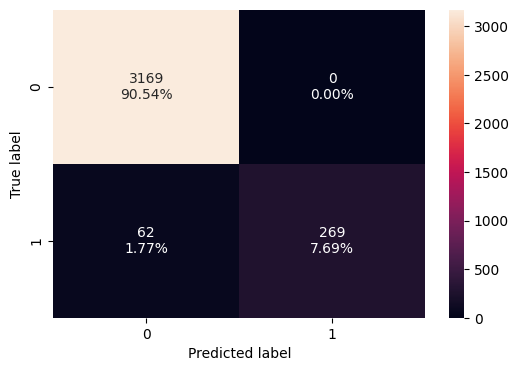

In [ ]:
# For the X_train and y_train
confusion_matrix_sklearn(model_pre_prune, X_train, y_train)

In [ ]:
# For the X_train and y_train
decision_tree_pretune_unbal_perf_train = model_performance_classification_sklearn(
    model_pre_prune, X_train, y_train
)
decision_tree_pretune_unbal_perf_train

,Accuracy,Recall,Precision,F1
0,0.982286,0.812689,1.0,0.896667


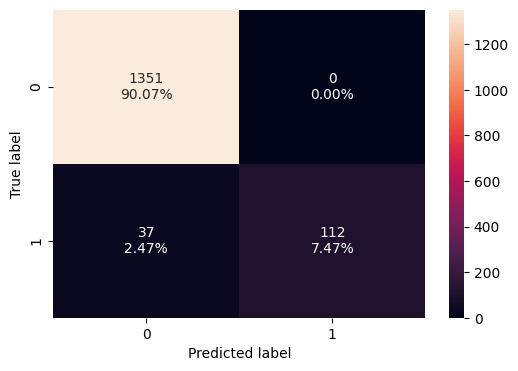

In [ ]:
# For the X_test and y_test
confusion_matrix_sklearn(model_pre_prune, X_test, y_test)

In [ ]:
# For the X_test and y_test
decision_tree_pretune_unbal_perf_test = model_performance_classification_sklearn(
    model_pre_prune, X_test, y_test
)
decision_tree_pretune_unbal_perf_test

,Accuracy,Recall,Precision,F1
0,0.975333,0.751678,1.0,0.858238


#### Pre prunning - Class Weight = Balanced

In [ ]:
# Define the parameters of the tree to iterate over
max_depth_values = [5,10,15,None]
max_leaf_nodes_values = [6]
min_samples_split_values = [10]
criterion=['gini','entropy']
splitter=['best','random']

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for criterion_val in criterion:
        for splitter_val in splitter:
            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes_values[0], # Accessing the element
                min_samples_split=min_samples_split_values[0], # Accessing the element
                criterion=criterion_val,
                splitter=splitter_val,
                class_weight='balanced',
                random_state=1
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator
                best_criterion=criterion_val
                best_splitter=splitter_val

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")
print(f"Criterion: {best_criterion}")
print(f"Splitter: {best_splitter}")

Best parameters found:
Max depth: 5
Max leaf nodes: 6
Min samples split: 10
Best test recall score: 0.912751677852349
Criterion: gini
Splitter: random


In [ ]:
# creating an instance of the best model
model_pre_prune_bal = best_estimator

# fitting the best model to the training data
model_pre_prune_bal.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=6,
                       min_samples_split=10, random_state=1, splitter='random')

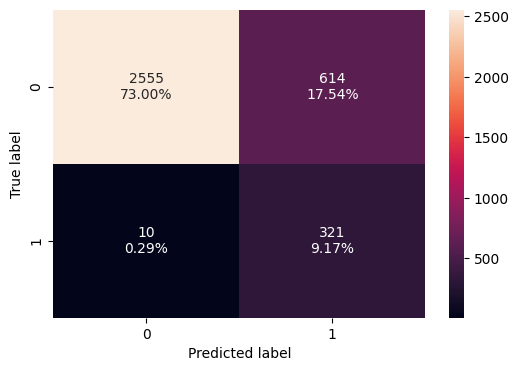

In [ ]:
# For the X_train and y_train
confusion_matrix_sklearn(model_pre_prune_bal, X_train, y_train)

In [ ]:
# For the X_train and y_train
decision_tree_pretune_bal_perf_train = model_performance_classification_sklearn(
    model_pre_prune_bal, X_train, y_train
)
decision_tree_pretune_bal_perf_train

,Accuracy,Recall,Precision,F1
0,0.821714,0.969789,0.343316,0.507109


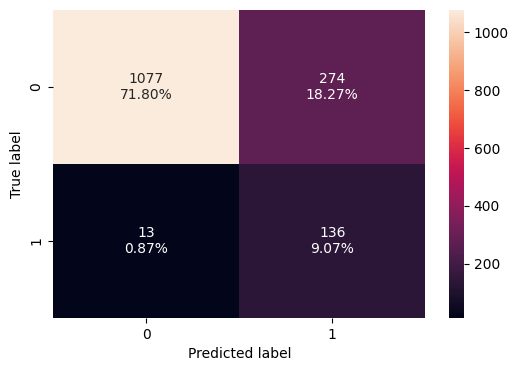

In [ ]:
# For the X_test and y_test
confusion_matrix_sklearn(model_pre_prune_bal, X_test, y_test)

In [ ]:
# For the X_test and y_test
decision_tree_pretune_bal_perf_test = model_performance_classification_sklearn(
    model_pre_prune_bal, X_test, y_test
)
decision_tree_pretune_bal_perf_test

,Accuracy,Recall,Precision,F1
0,0.808667,0.912752,0.331707,0.486583


### Decision Tree (Post pruning)

#### Post prunning - Class Weight = Not Balanced

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path1 = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path1.ccp_alphas), path1.impurities

In [ ]:
# Created a Dataframe containing the generated attributes of  the effective aplpha and the coresponding total leaf impurity, ccp_alphas and inpurities respectively.
pd.DataFrame(path1)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000267,0.000533
2,0.000268,0.001607
3,0.000276,0.002710
4,0.000278,0.003824
5,0.000359,0.004900
6,0.000381,0.005280
7,0.000381,0.005661
8,0.000381,0.006042
9,0.000429,0.006471


- Greater values of ``ccp_alpha`` increase the number of nodes pruned.
- Here we only show the effect of ``ccp_alpha`` on regularizing the trees and how to choose the optimal ``ccp_alpha`` value.
- Included hyperparameter for a balanced class weight

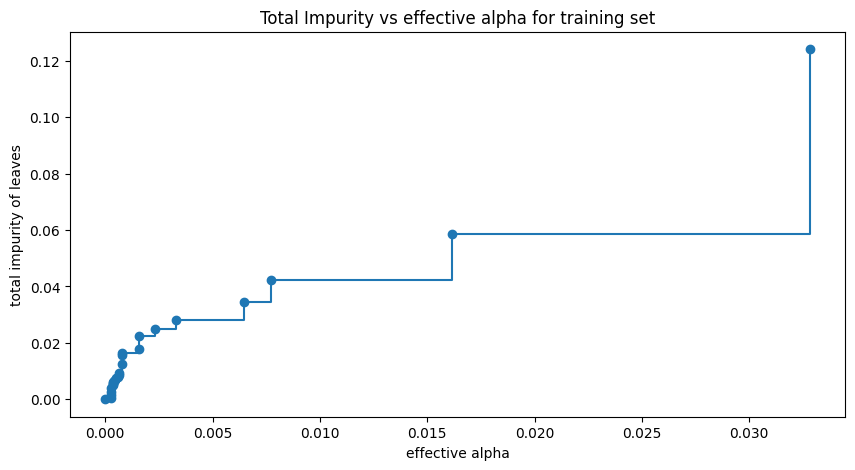

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 3 with ccp_alpha: 0.04708834100596768


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

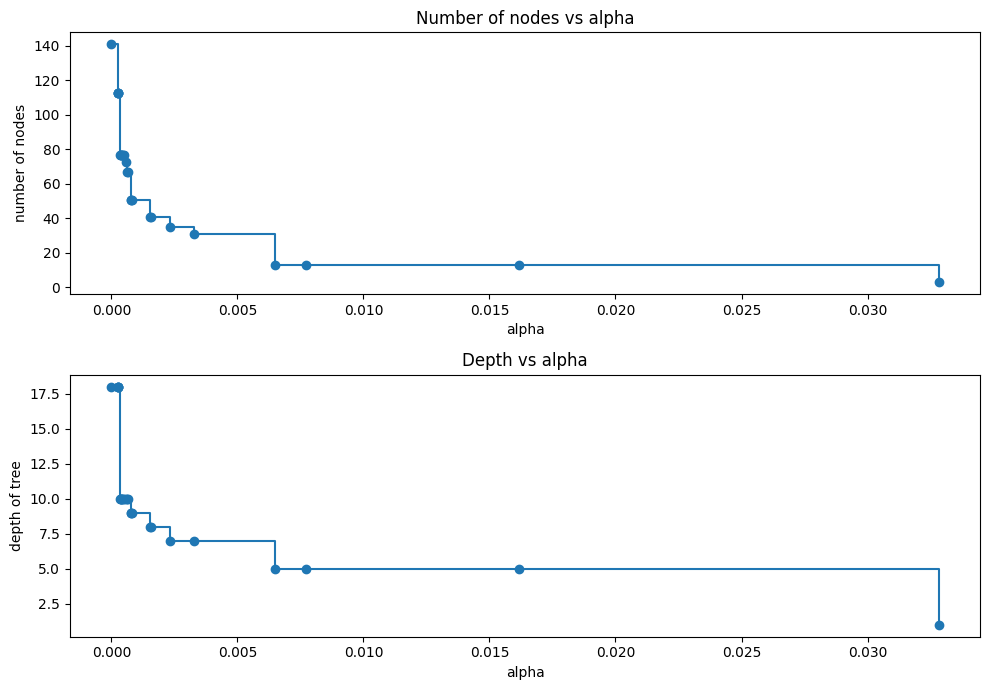

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

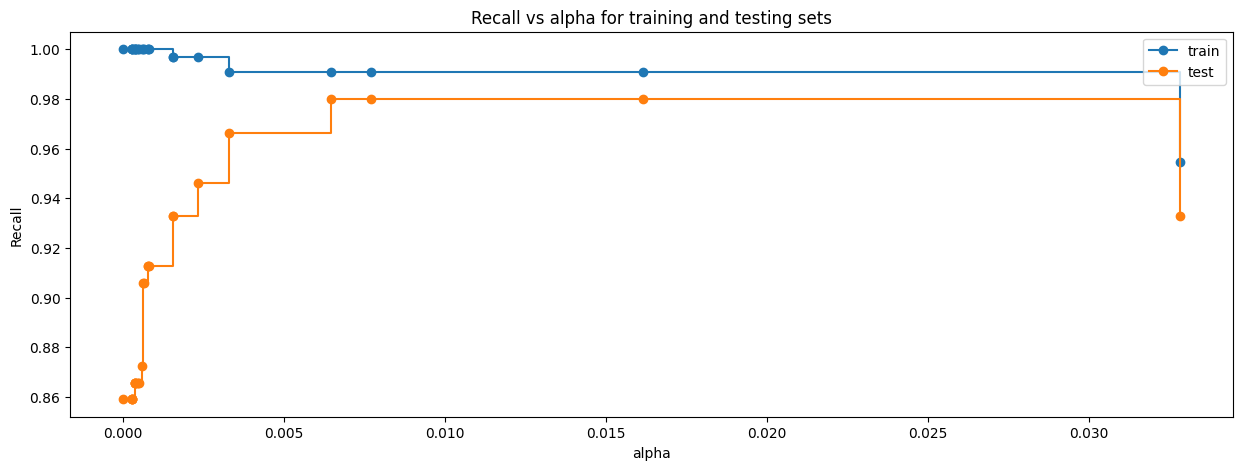

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.006472814718223811, class_weight='balanced',
                       random_state=1)


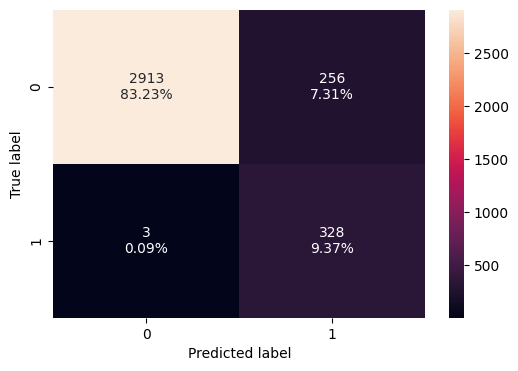

In [ ]:
model_post_pru_unbal = best_model
confusion_matrix_sklearn(model_post_pru_unbal, X_train, y_train)

In [ ]:
decision_tree_posttune_unbal_perf_train = model_performance_classification_sklearn(
    model_post_pru_unbal, X_train, y_train
)
decision_tree_posttune_unbal_perf_train

,Accuracy,Recall,Precision,F1
0,0.926,0.990937,0.561644,0.71694


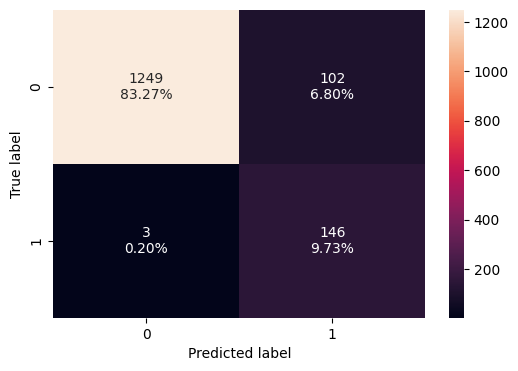

In [ ]:
# For X_test and y_test
confusion_matrix_sklearn(model_post_pru_unbal, X_test, y_test)

In [ ]:
decision_tree_posttune_unbal_perf_test = model_performance_classification_sklearn(
    model_post_pru_unbal, X_test, y_test
)
decision_tree_posttune_unbal_perf_test

,Accuracy,Recall,Precision,F1
0,0.93,0.979866,0.58871,0.735516


In [ ]:
# Get feature names from the test data
feature_names = X_test.columns

* In the post-pruned tree also, the model is giving a generalized result since the recall scores on both the train and test data are coming to be around 0.98 which shows that the model is able to generalize well on unseen data.

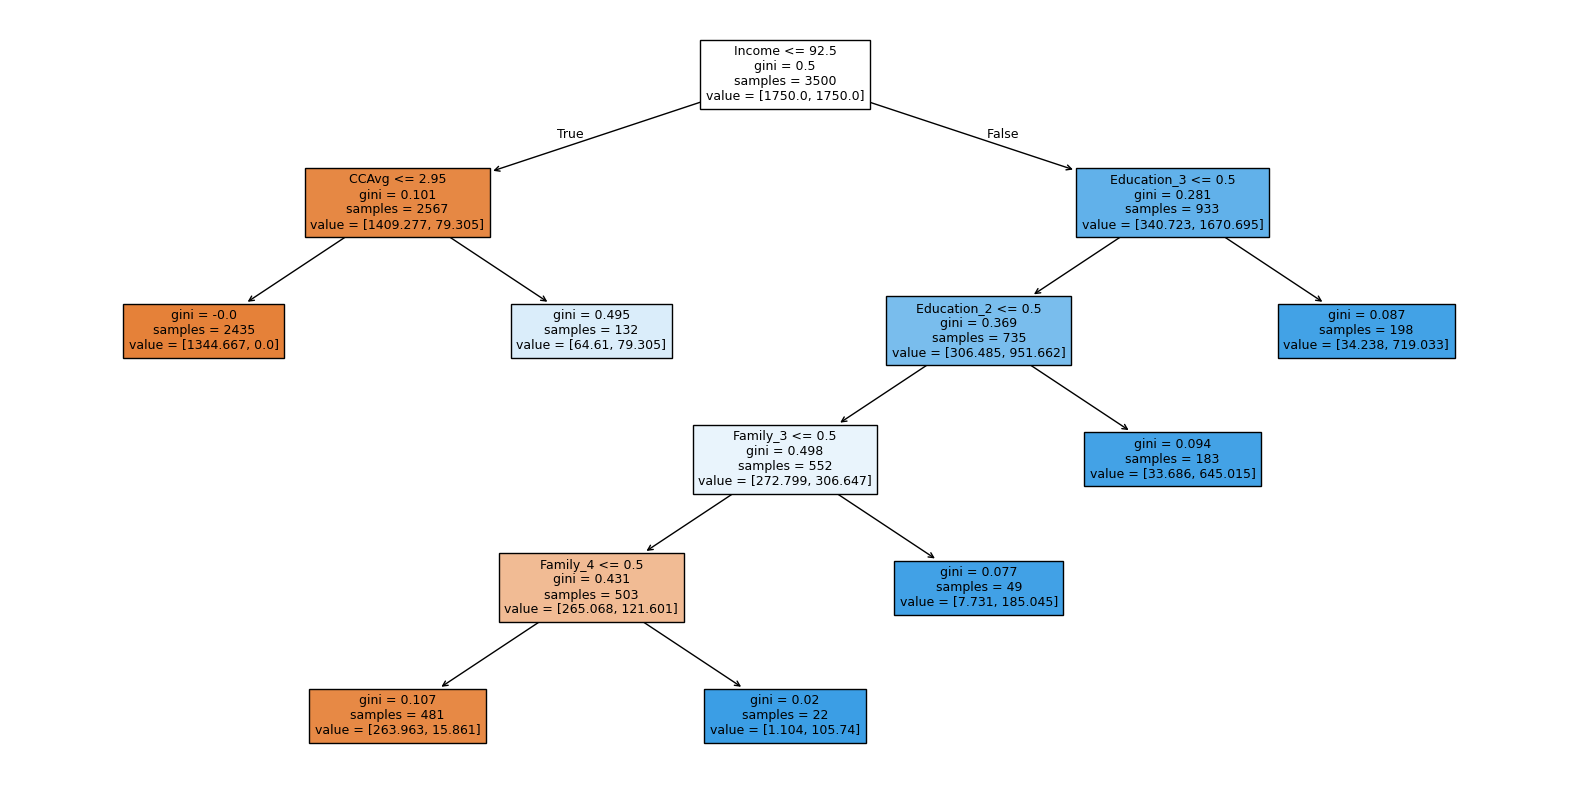

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    model_post_pru_unbal,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model_post_pru_unbal, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [263.96, 15.86] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [1.10, 105.74] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [7.73, 185.05] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- weights: [33.69, 645.02] class: 1
|   |--- Education_3 >  0.50
|   |   |--- weights: [34.24, 719.03] class: 1



In [ ]:
importances = model_post_pru_unbal.feature_importances_
indices = np.argsort(importances)

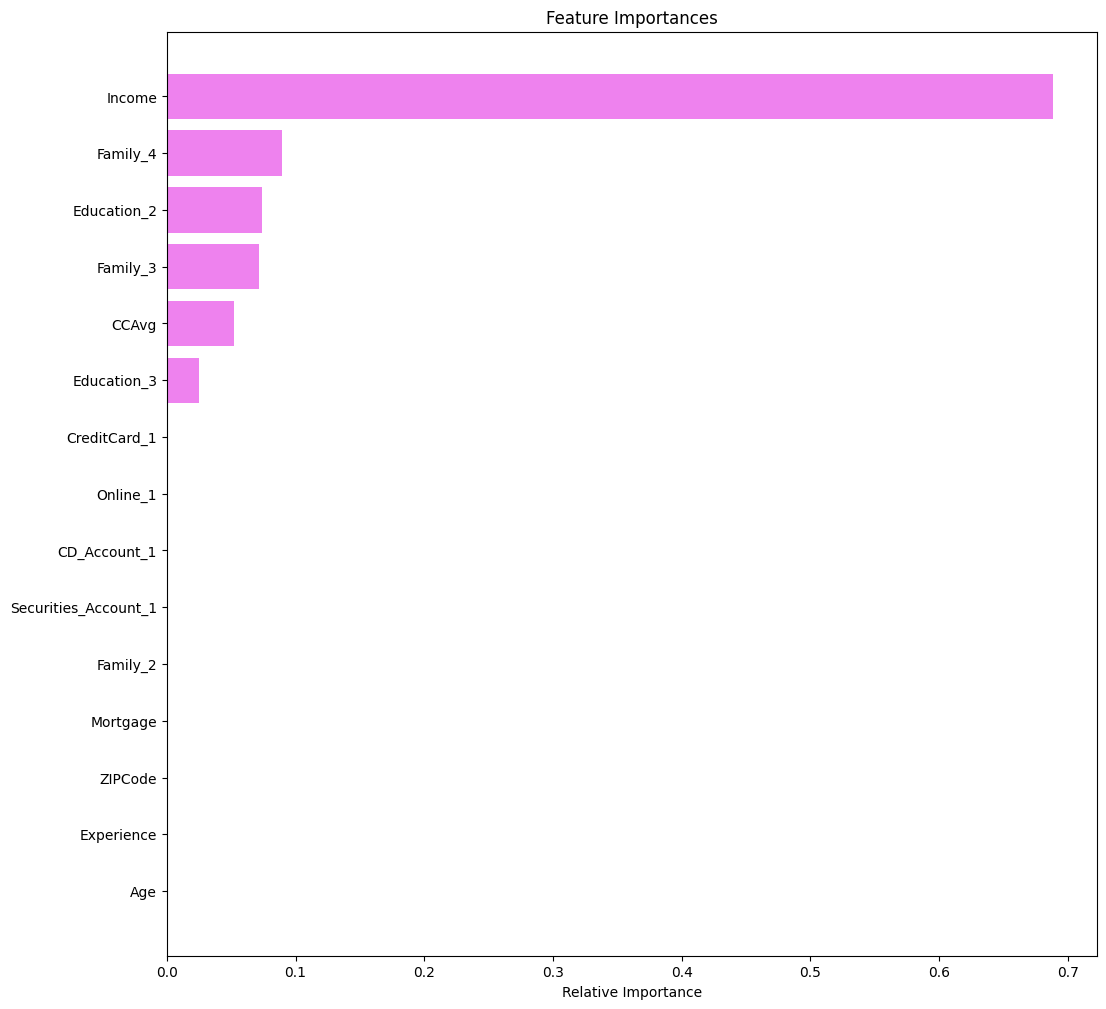

In [ ]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Post prunning - Class Weight = Balanced

- Greater values of ``ccp_alpha`` increase the number of nodes pruned.
- Here we only show the effect of ``ccp_alpha`` on regularizing the trees and how to choose the optimal ``ccp_alpha`` value.
- Included hyperparameter for a balanced class weight

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
# Created a Dataframe containing the generated attributes of  the effective aplpha and the coresponding total leaf impurity, ccp_alphas and inpurities respectively.
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-3.162306e-15
1,3.853725e-19,-3.161921e-15
2,3.853725e-19,-3.161535e-15
3,3.853725e-19,-3.161150e-15
4,7.006772e-19,-3.160449e-15
5,7.707449e-19,-3.159678e-15
6,7.707449e-19,-3.158908e-15
7,7.882619e-19,-3.158119e-15
8,1.051016e-18,-3.157068e-15
9,1.257806e-17,-3.144490e-15


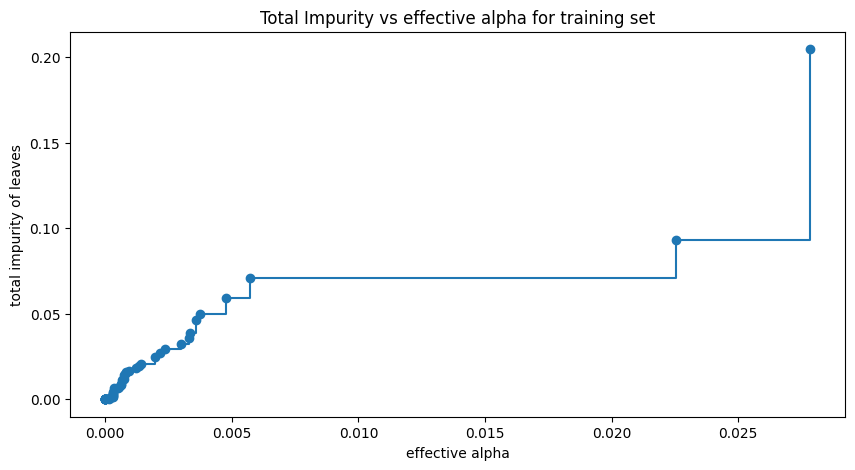

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.29537927599923164


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

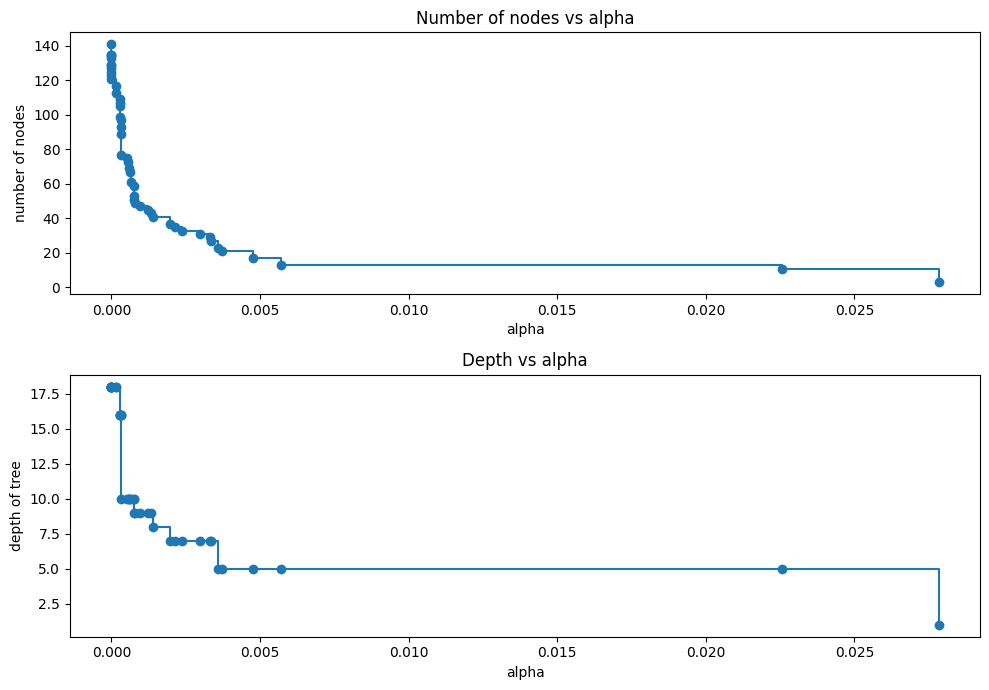

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

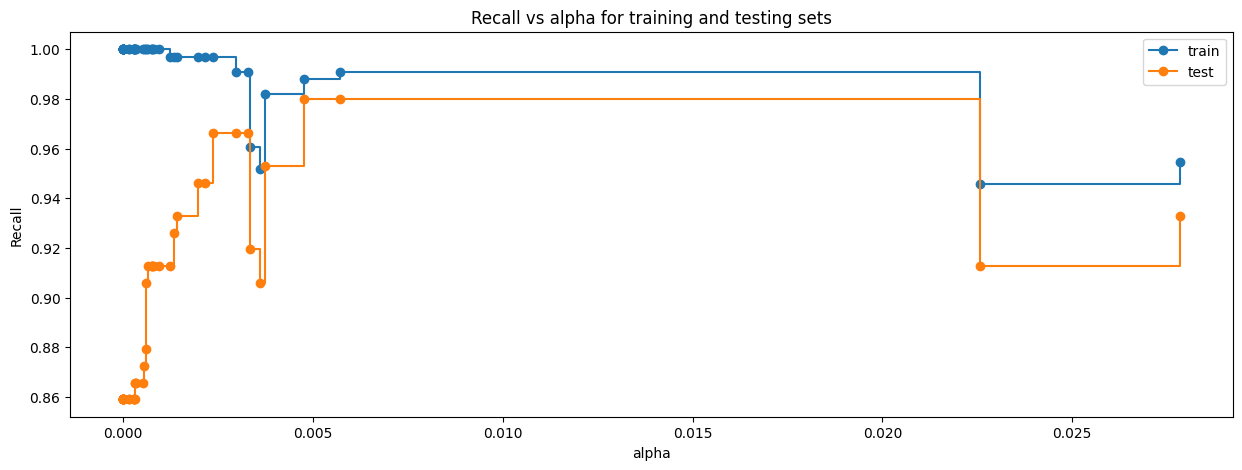

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0047547781972992606, class_weight='balanced',
                       random_state=1)


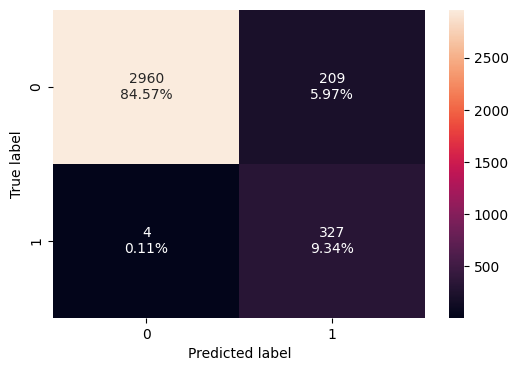

In [ ]:
model_post_pru = best_model
confusion_matrix_sklearn(model_post_pru, X_train, y_train)

In [ ]:
decision_tree_posttune_bal_perf_train = model_performance_classification_sklearn(
    model_post_pru, X_train, y_train
)
decision_tree_posttune_bal_perf_train

,Accuracy,Recall,Precision,F1
0,0.939143,0.987915,0.610075,0.754325


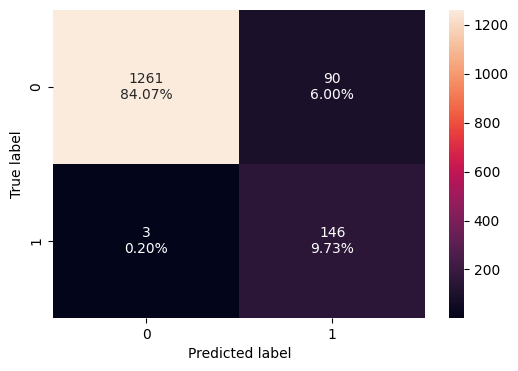

In [ ]:
# For X_test and y_test
confusion_matrix_sklearn(model_post_pru, X_test, y_test)

In [ ]:
decision_tree_posttune_bal_perf_test = model_performance_classification_sklearn(
    model_post_pru, X_test, y_test
)
decision_tree_posttune_bal_perf_test

,Accuracy,Recall,Precision,F1
0,0.938,0.979866,0.618644,0.758442


In [ ]:
# Get feature names from the test data
feature_names = X_test.columns

* In the post-pruned tree also, the model is giving a generalized result since the recall scores on both the train and test data are coming to be around 0.98 which shows that the model is able to generalize well on unseen data.

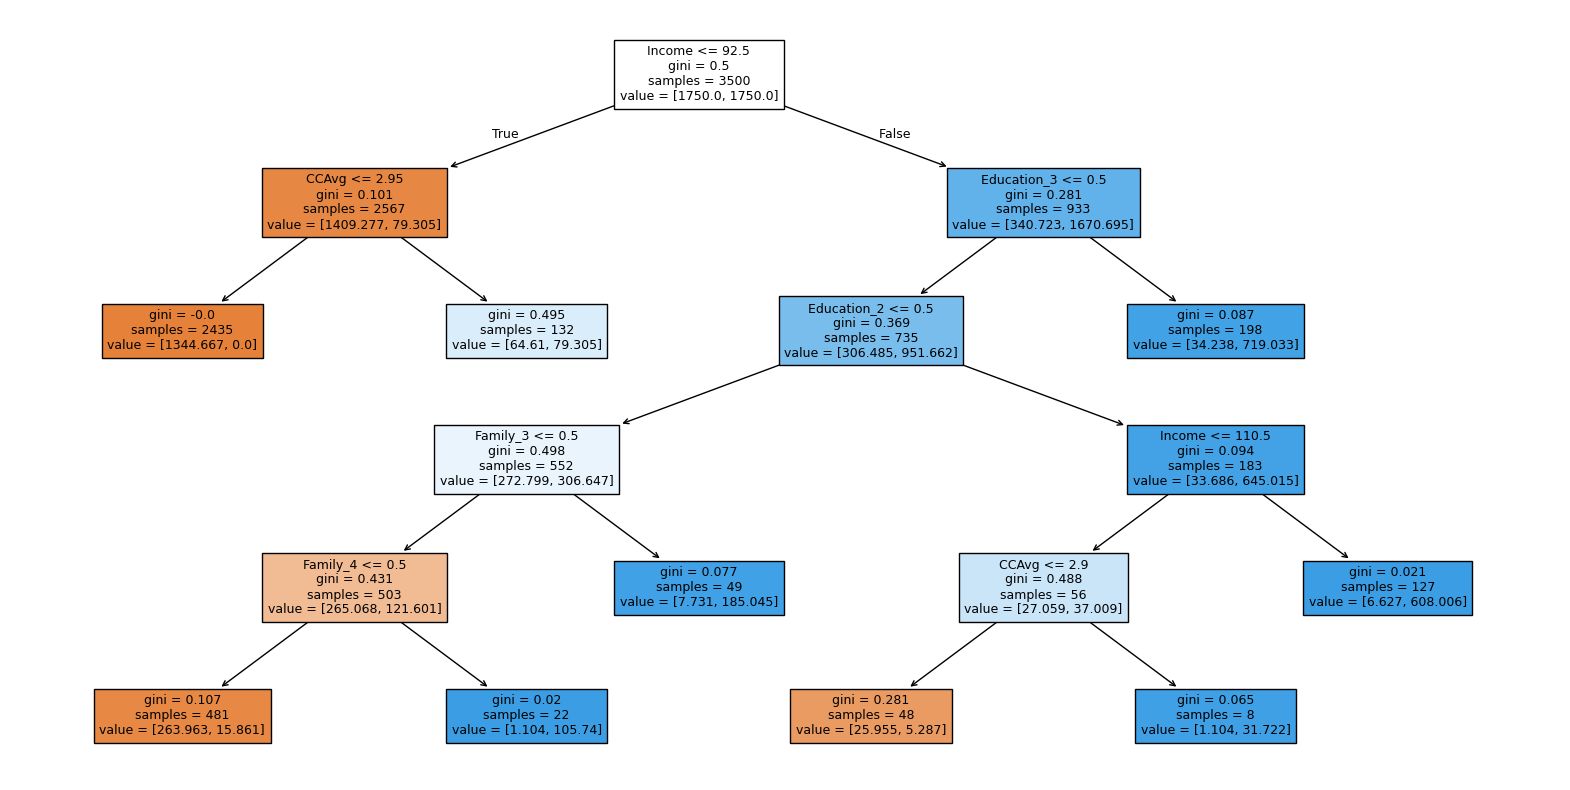

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    model_post_pru,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model_post_pru, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [263.96, 15.86] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [1.10, 105.74] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [7.73, 185.05] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- Income <= 110.50
|   |   |   |   |--- CCAvg <= 2.90
|   |   |   |   |   |--- weights: [25.95, 5.29] class: 0
|   |   |   |   |--- CCAvg >  2.90
|   |   |   |   |   |--- weights: [1.10, 31.72] class: 1
|   |   |   |--- Income >  110.50
|   |   |   |   |--- weights: [6.63, 608.01] class: 1
|   |--- Education_3 >  0.50
|   |   |--- weights: [34.24, 719.03] class: 1



In [ ]:
importances = model_post_pru.feature_importances_
indices = np.argsort(importances)

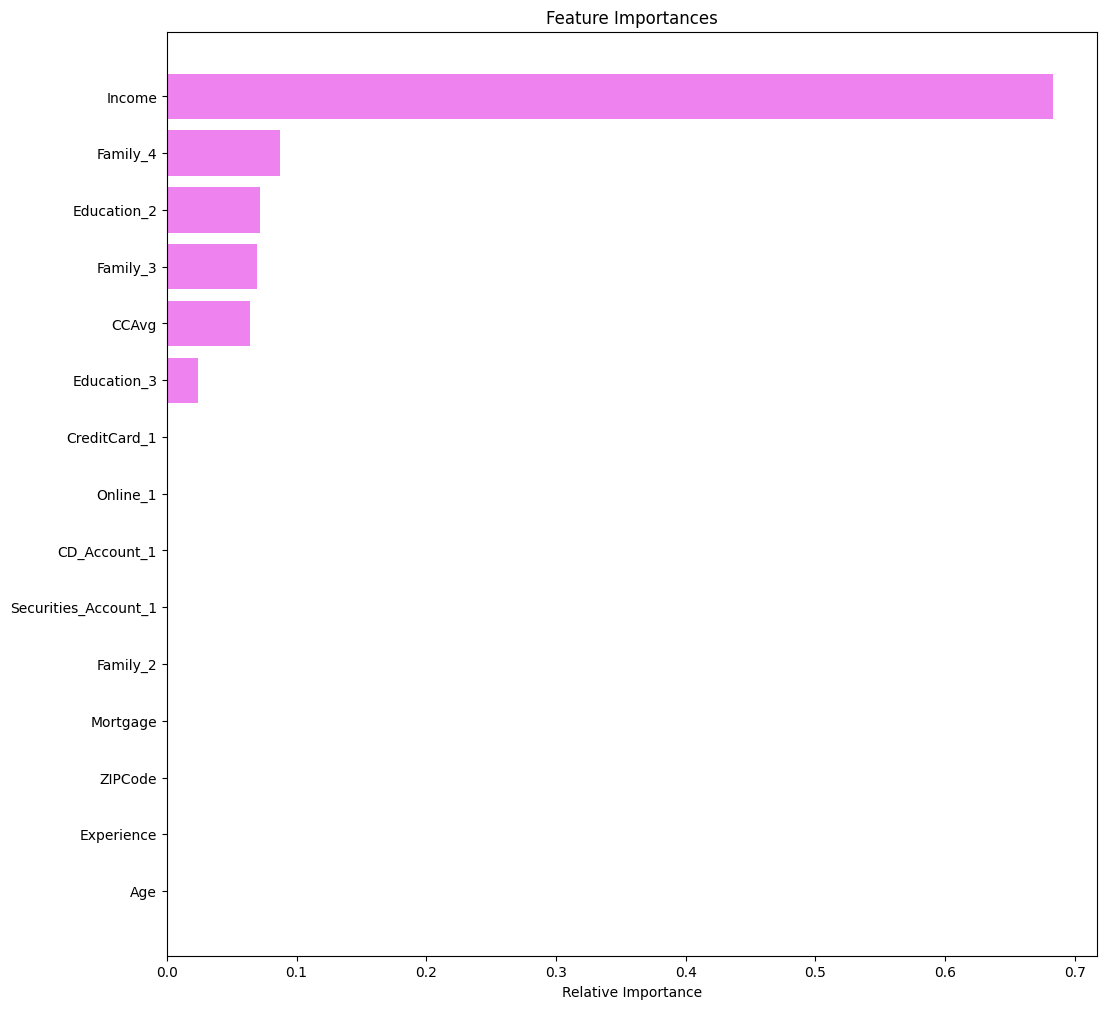

In [ ]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        decision_tree_def_bal_perf_train.T,
        decision_tree_pretune_unbal_perf_train.T,
        decision_tree_pretune_bal_perf_train.T,
        decision_tree_posttune_unbal_perf_train.T,
        decision_tree_posttune_bal_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree no class_weight (sklearn default)",
    "Decision Tree with class_weight (sklearn default)",
    "Decision Tree Pre-prunned no class_weight",
    "Decision Tree Pre-prunned with class_weight",
    "Decision Tree Post-prunned no class_weight",
    "Decision Tree Post-prunned with class_weight",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree no class_weight (sklearn default),Decision Tree with class_weight (sklearn default),Decision Tree Pre-prunned no class_weight,Decision Tree Pre-prunned with class_weight,Decision Tree Post-prunned no class_weight,Decision Tree Post-prunned with class_weight
Accuracy,1.0,1.0,0.982286,0.821714,0.926000,0.939143
Recall,1.0,1.0,0.812689,0.969789,0.990937,0.987915
Precision,1.0,1.0,1.000000,0.343316,0.561644,0.610075
F1,1.0,1.0,0.896667,0.507109,0.716940,0.754325


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        decision_tree_def_bal_perf_test.T,
        decision_tree_pretune_unbal_perf_test.T,
        decision_tree_pretune_bal_perf_test.T,
        decision_tree_posttune_unbal_perf_test.T,
        decision_tree_posttune_bal_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree no class_weight (sklearn default)",
    "Decision Tree with class_weight (sklearn default)",
    "Decision Tree Pre-prunned no class_weight",
    "Decision Tree Pre-prunned with class_weight",
    "Decision Tree Post-prunned no class_weight",
    "Decision Tree Post-prunned with class_weight",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree no class_weight (sklearn default),Decision Tree with class_weight (sklearn default),Decision Tree Pre-prunned no class_weight,Decision Tree Pre-prunned with class_weight,Decision Tree Post-prunned no class_weight,Decision Tree Post-prunned with class_weight
Accuracy,0.980667,0.974667,0.975333,0.808667,0.930000,0.938000
Recall,0.912752,0.859060,0.751678,0.912752,0.979866,0.979866
Precision,0.894737,0.882759,1.000000,0.331707,0.588710,0.618644
F1,0.903654,0.870748,0.858238,0.486583,0.735516,0.758442


## Which Model was selected

In [ ]:
models_test_comp_df_best = pd.concat(
    [
        decision_tree_posttune_bal_perf_train.T,
        decision_tree_posttune_bal_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df_best.columns = [

    "Train Set",
    "Test Set",
]
print("Performance Metrics: Decision Tree Post Prunned with class weight = Balanced")
models_test_comp_df_best

Performance Metrics: Decision Tree Post Prunned with class weight = Balanced


,Train Set,Test Set
Accuracy,0.939143,0.938000
Recall,0.987915,0.979866
Precision,0.610075,0.618644
F1,0.754325,0.758442


#### The post-prunned and class weight balanced model was selected due to it generalized well, against the training set especially for the Recall and Accuracy metrics. Though the Precision metric resulted slightly above 0.61, the priority objective is more about identifying those customers that did not accept the personal loan offer, than those that does customers that were errouneously misclassified as customers that actually did not accept the personal loan offer as predicted that did accept the personal loan offer. The below average Presicion metric (in comparision to the other Precsion metrics from the other models) had a slight impact in lowering the F1 score.

* Again the objective here is not so much to identify those customer's profile that would accept a personal offer, but those that would NOT accept a personal loan, so a campaign with offer (discounts, lower start interest rates, etc) could be targeted at those customers.

## Actionable Insights and Business Recommendations


### What recommendations would you suggest to the bank?

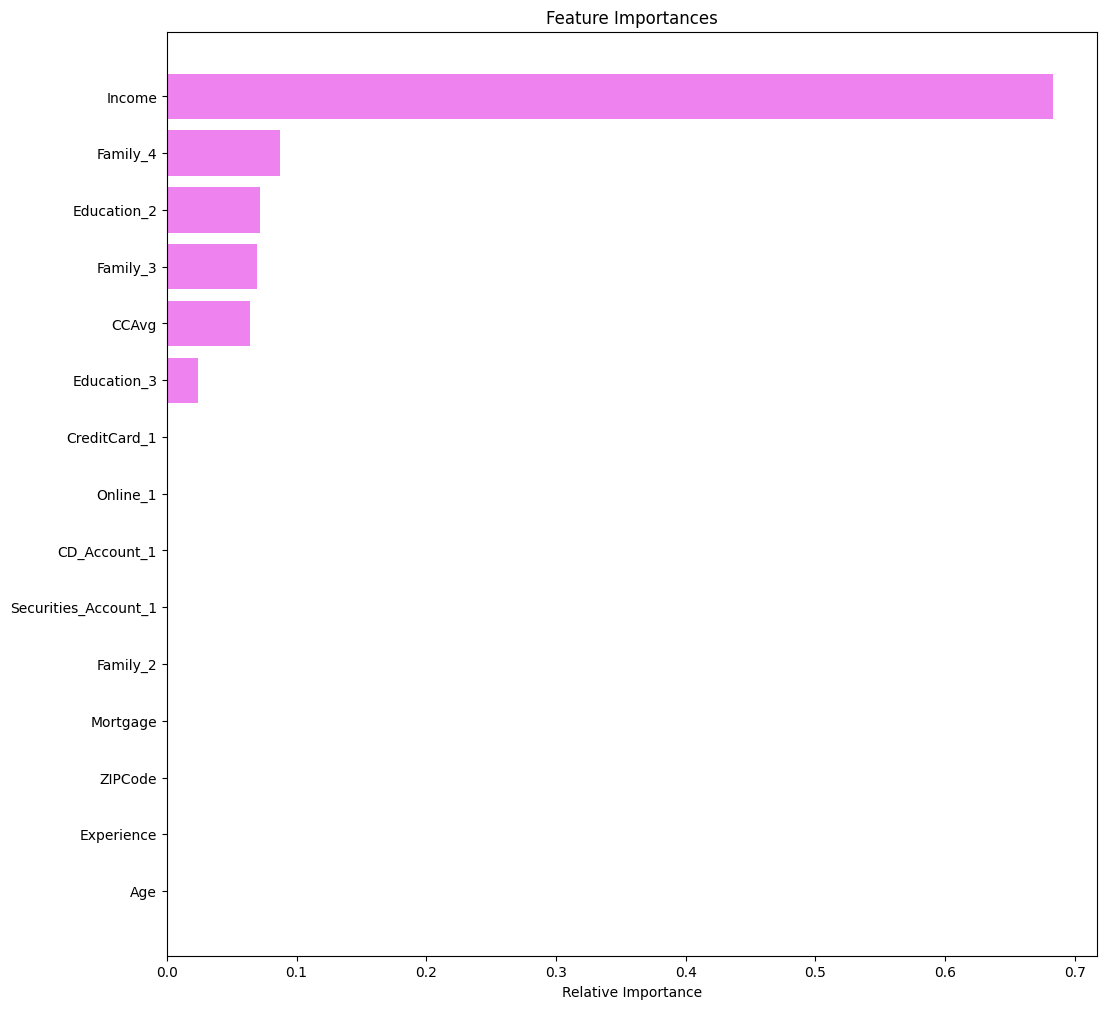

In [ ]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


Based on the model selected offer a promotional campaign both for internal or external customers -  the latter to attract them to open a banking relationship -, it should focus on customers or potential customers with the following profile:
* Potential customers with annual income higher than 90K **&**
* Potential customers with large family sizes, preferably greater than 3 family members **&**
* Potential customers with graduate level education, and advanced professionals **&**
* Average spending on credit cards per month (in thousand dollars) less than 2.5
* **with  highest importance feature being income.**

* **Again the objective here is not so much to identify those customer's profile that would accept a personal offer, but those that would NOT accept a personal loan, so a campaign with offer (discounts, lower start interest rates, etc) could be targeted at those customers.**


___